# Ejemplo 4: Sistemas de recomendación

## Descripción
Crear un sistema de recomendación de películas usando K-Means en Python implica agrupar películas en función de sus características y recomendar películas similares a las que un usuario ha visto. En este ejemplo, utilizaremos el conjunto de datos MovieLens 100K y scikit-learn para aplicar K-Means. Aquí tienes el código para ello:

## Requisitos
Primero, debes cargar el conjunto de datos y realizar un preprocesamiento básico. Asegúrate de tener instalada la biblioteca pandas y descarga el conjunto de datos MovieLens 100K desde [aquí](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip)

Importamos las bibliotecas que aprendimos a usar a lo largo de la sesión.

In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Cargamos los archivos csv previamente descargados

In [76]:
# Cargar los datos de películas y calificaciones de usuarios
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [78]:
# Crear una tabla pivote con las calificaciones de usuarios como valores y las películas como columnas
user_movie_ratings = ratings.pivot(index='userId', columns='movieId', values='rating')
user_movie_ratings.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Rellenar valores nulos con 0
user_movie_ratings = user_movie_ratings.fillna(0)
user_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
user_movie_ratings_scaled = scaler.fit_transform(user_movie_ratings)
user_movie_ratings_scaled

array([[ 1.35135521, -0.45137737,  3.87730537, ..., -0.04052204,
        -0.04052204, -0.04052204],
       [-0.71333277, -0.45137737, -0.2894531 , ..., -0.04052204,
        -0.04052204, -0.04052204],
       [-0.71333277, -0.45137737, -0.2894531 , ..., -0.04052204,
        -0.04052204, -0.04052204],
       ...,
       [ 0.57709721,  1.00737864,  1.79392613, ..., -0.04052204,
        -0.04052204, -0.04052204],
       [ 0.83518321, -0.45137737, -0.2894531 , ..., -0.04052204,
        -0.04052204, -0.04052204],
       [ 1.8675272 , -0.45137737, -0.2894531 , ..., -0.04052204,
        -0.04052204, -0.04052204]])

Escalar los datos para que tengan media cero y desviación estándar uno es un proceso de normalización que ayuda a estandarizar las características de un conjunto de datos. Esto significa que cada característica (o variable) en el conjunto de datos tendrá una distribución con una media de cero y una desviación estándar de uno. Esta transformación es beneficiosa en varios contextos, incluyendo:

- **Comparación de variables:** Facilita la comparación de diferentes variables con unidades y escalas diferentes, ya que todas se expresan en una escala común.

- **Mejora del rendimiento de algoritmos:** Muchos algoritmos de aprendizaje automático, como K-Means, SVM y redes neuronales, funcionan mejor cuando las características tienen una escala similar. La normalización ayuda a evitar que las características con valores más grandes dominen las que tienen valores más pequeños.

- **Estabilidad numérica:** Puede ayudar a evitar problemas numéricos, como la falta de convergencia en algoritmos iterativos, al mantener los valores de las características en un rango manejable.

- **Interpretación más fácil:** Hace que los coeficientes de modelos lineales sean más interpretables, ya que la magnitud de los coeficientes refleja la importancia relativa de las características en la predicción.

En resumen, escalar los datos para que tengan media cero y desviación estándar uno es una técnica común en el preprocesamiento de datos que facilita el análisis y mejora el rendimiento de muchos algoritmos de aprendizaje automático.

In [83]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=50)
user_movie_ratings_pca = pca.fit_transform(user_movie_ratings_scaled)
user_movie_ratings_pca

array([[ 4.56249195e+00, -1.49098415e-01,  3.48286166e-01, ...,
         2.40949180e+00, -3.36148104e+00, -2.37324358e-01],
       [-8.02388138e+00,  2.63295788e-01, -1.13855235e+00, ...,
        -1.27501251e-01,  5.38243017e-01, -5.62249248e-01],
       [-8.24265998e+00,  5.66647434e-01, -1.30113630e+00, ...,
         3.80749533e-01, -3.82695218e-01, -7.05772858e-01],
       ...,
       [ 3.39609502e+01, -1.01040836e+01,  5.73271603e+00, ...,
        -6.53882186e-01,  1.14851984e+01,  2.09742558e+00],
       [-7.97913742e+00,  6.61400518e-01, -2.22533359e+00, ...,
        -9.32079679e-02,  4.14128885e-03, -8.14333563e-01],
       [ 1.05741570e+02, -8.56277370e+01,  3.89554318e+01, ...,
         6.44251832e-01, -1.04304863e+00, -9.05410292e-01]])

La Reducción de Dimensionalidad utilizando el Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica que se utiliza para simplificar un conjunto de datos conservando la mayor cantidad posible de información importante. Sirve para:

- **Eliminar características redundantes:** PCA identifica las relaciones y correlaciones entre las características originales de un conjunto de datos y las combina en nuevas características (componentes principales) no correlacionadas. Esto reduce la redundancia en los datos.

- **Reducir la complejidad:** Si tienes un conjunto de datos con muchas características, PCA puede ayudar a reducir la dimensionalidad, lo que significa que trabajarás con menos variables. Esto facilita la visualización y la interpretación de los datos.

- **Mejorar el rendimiento:** Al reducir la dimensionalidad, PCA puede acelerar el entrenamiento de algoritmos de aprendizaje automático, ya que hay menos datos para procesar. Además, puede mejorar el rendimiento de algunos algoritmos al eliminar el ruido o el exceso de información.

- **Visualización:** PCA es útil para visualizar datos de alta dimensión en un espacio de menor dimensión (por ejemplo, 2D o 3D), lo que facilita la identificación de patrones, agrupamientos y tendencias en los datos.

En resumen, PCA es una técnica de reducción de dimensionalidad que ayuda a simplificar y comprimir datos complejos mientras se retiene la información esencial. Esto es valioso en tareas de análisis de datos y aprendizaje automático, especialmente cuando se trabaja con conjuntos de datos de alta dimensión.






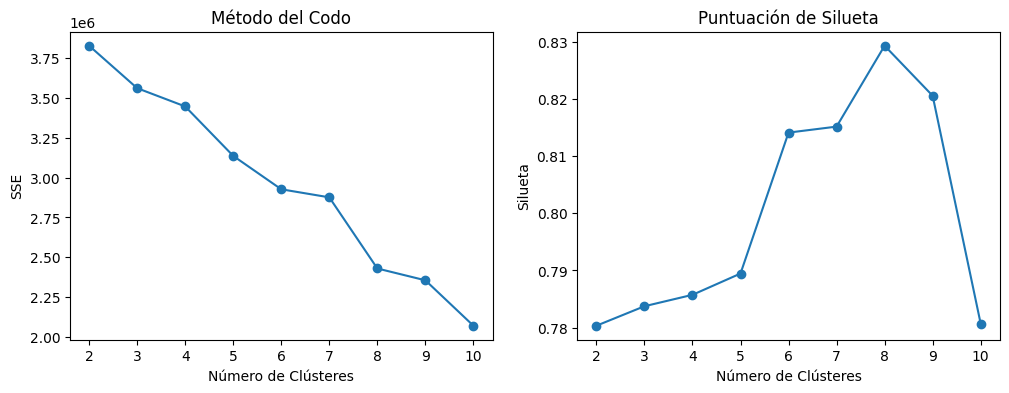

In [85]:
# Encontrar el número óptimo de clústeres utilizando el método del codo
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(user_movie_ratings_pca)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(user_movie_ratings_pca, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silueta')
plt.show()

In [86]:
# Basado en el método del codo y la puntuación de silueta, elige el número óptimo de clústeres (puede ser 4 en este caso)
n_clusters = 4

# Entrenar el modelo K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(user_movie_ratings_pca)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [87]:
# Asignar etiquetas de clúster a cada usuario
user_movie_ratings['cluster'] = kmeans.labels_
user_movie_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,193567,193571,193573,193579,193581,193583,193585,193587,193609,cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [92]:
# Recomendar películas para un usuario en particular (por ejemplo, userId = 1)
user_id_to_recommend = 1
user_cluster = user_movie_ratings.loc[user_id_to_recommend, 'cluster']
recommended_movies = user_movie_ratings[user_movie_ratings['cluster'] == user_cluster].sample(n=5).drop(columns='cluster')

# Obtener información de las películas recomendadas
recommended_movie_ids = recommended_movies.columns
recommended_movie_info = movies[movies['movieId'].isin(recommended_movie_ids)]

print("Películas recomendadas para el usuario {}:".format(user_id_to_recommend))
recommended_movie_info[['title', 'genres']]

Películas recomendadas para el usuario 1:


,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Prueba cambiar el usuario